In [8]:
with open('/Users/keshen/Downloads/tfidfvisual.csv', 'r') as file:
    data = [x.split('\n')[0].split(',') for x in file.readlines()][1:]
    print(data[0][1])
    X = [float(line[1]) for line in data]
    Y = [float(line[5]) for line in data]
    Label = [line[0] for line in data]
    color = [line[2] for line in data]


0.00306448
['news', 'round', 'progress', 'condition', 'student', 'cancer', 'valuable', 'pertinent', 'complex', 'inpatient', 'need', 'tactive', 'tfamily', 'ensure', 'intern', 'advanced', 'patient', 'physician', 'successfully', 'great', 'attend', 'task', 'developed', 'knowledge', 'effectively', 'illness', 'highly', 'deliver', 'incorporate', 'good', 'thospital', 'growth', 'rapport', 'appropriately', 'factor', 'improve', 'update', 'accurately', 'strong', 'independently', 'tcare', 'patientcentered', 'apply', 'member', 'function', 'include', 'outstanding', 'tlevel', 'able', 'role', 'seek', 'appropriate', 'excellent', 'rexxents', 'situation', 'level', 'week', 'act', 'operate', 'solid', 'note', 'clerkship', 'communication', 'identify', 'central', 'advance', 'displayed', 'professional', 'wonderful', 'feedback', 'intern', 'care', 'comfortable', 'reliable', 'trotation', 'data', 'family', 'nuanced', 'deep', 'experience', 'medical', 'communicate', 'day', 'efficient', 'performance', 'doctor', 'respo

In [18]:
!pip install adjustText


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

In [14]:
colordict = {'R': '#ECA8A8', 'P': '#CEAED4', 'B': '#74AED4'}

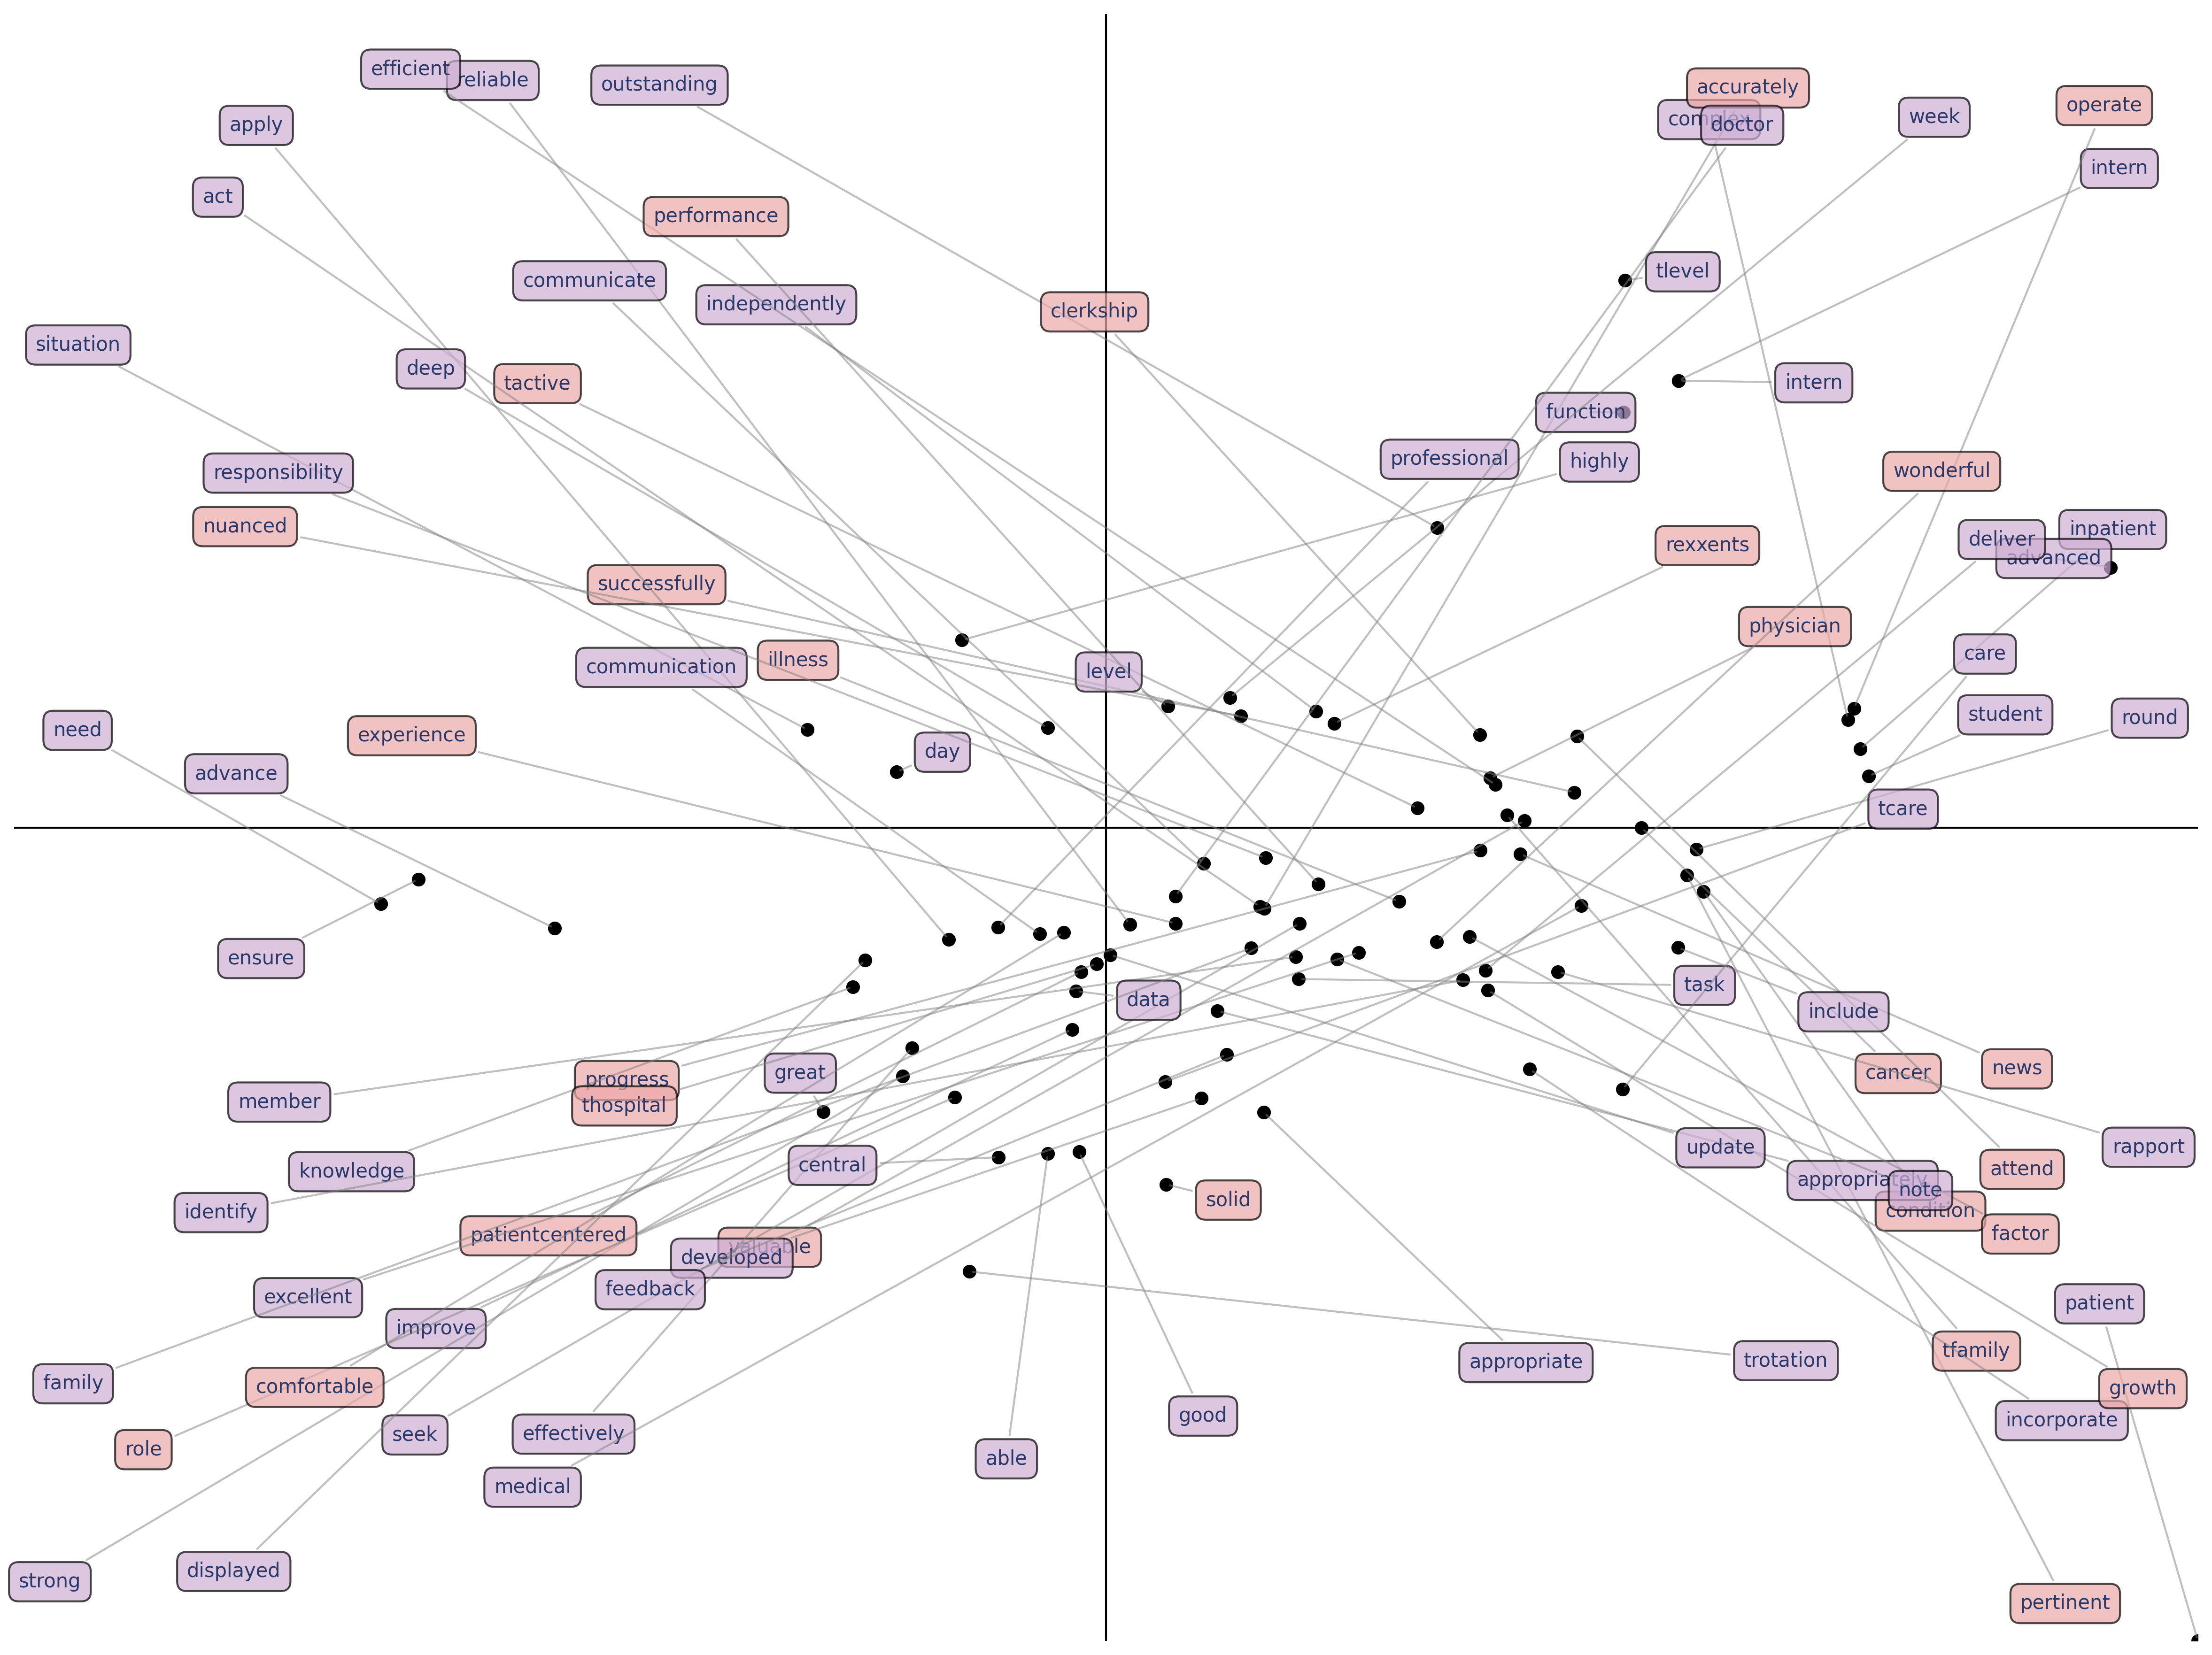

In [74]:
x = np.array(X)
y = np.array(Y)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(20, 15), dpi=300)
ax.scatter(x, y, color='black')
x_abs_max = np.max(np.abs(x))
y_abs_max = np.max(np.abs(y))
ax.set_xlim(-x_abs_max, x_abs_max)
ax.set_ylim(-y_abs_max, y_abs_max)

# plt.figure(figsize=(15, 15), dpi=300)
# plt.scatter(x, y, color='black')

texts = []
for i, label in enumerate(Label):
    # Custom text alignment based on position
    ha = 'right' if x[i] < np.median(x) else 'left'
    va = 'bottom' if y[i] < np.median(y) else 'top'
    text = ax.annotate(label, 
                 xy=(x[i], y[i]),
                 xytext=(np.random.uniform(0, 9), np.random.uniform(0, 30)),
                 textcoords="offset points",
                 ha=ha,
                 va=va,
                 color='#293A6A', 
                 bbox=dict(boxstyle="round,pad=0.5", facecolor=colordict[color[i]], edgecolor='black', alpha=0.7),
                 arrowprops=dict(arrowstyle='-', color='grey', alpha=0.5)) 
    texts.append(text)

adjust_text(texts, expand_points=(1.5, 1.5), expand_text=(1.5, 1.5),  force_points=1, force_text=1)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)

# Turn off tick marks
ax.tick_params(axis='both', which='both', length=0)

# Optionally, also hide tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()